In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

In [2]:
cities = [0, 1, 2, 3, 4]

distance = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)

In [3]:
def fitness(chromosome):
    total = 0
    for i in range(len(chromosome) - 1):
        total += distance[chromosome[i], chromosome[i + 1]]
    return total

In [4]:
fitness([3, 4, 2, 0, 1])

153.63000000000002

In [5]:
class Population():
    def __init__(self, gen_num, bag):
        self.gen_num = gen_num
        self.bag = bag
        self.score = float("inf")
        self.parents = []
        self.best = None
        self.next = None

In [6]:
def init_population(n_population):
    return Population(
    0, np.asarray([np.random.permutation(cities) for _ in range(n_population)])
    )

In [7]:
init_pop = init_population(5)
init_pop.bag

array([[0, 2, 4, 1, 3],
       [4, 2, 0, 1, 3],
       [2, 4, 0, 3, 1],
       [4, 1, 3, 2, 0],
       [3, 1, 4, 0, 2]])

In [8]:
def _evaluate(self):
    distances = np.asarray(
        [fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[np.where(distances == self.score)][0]
    return distances / np.sum(distances)
    
Population._evaluate = _evaluate

In [9]:
init_pop._evaluate()

array([0.20567573, 0.20972047, 0.25621039, 0.14123831, 0.18715509])

In [10]:
init_pop.best

array([4, 1, 3, 2, 0])

In [11]:
init_pop.score

86.25

In [12]:
def select(self):
    fit = self._evaluate()
    while len(self.parents) < 2:
        idx = np.random.randint(0, len(fit))
        roulette = np.random.randn()
        if fit[idx] > roulette:
            self.parents.append(self.bag[idx])

Population.select = select

In [13]:
init_pop.select()
init_pop.parents

[array([4, 1, 3, 2, 0]), array([2, 4, 0, 3, 1])]

In [14]:
def mutate(self, p_cross=0.5, p_mut=0.5):
    next_bag = []
    for _ in range(len(self.bag)):
        if np.random.rand() < p_cross:
            child = crossover(self.parents[0], self.parents[0])
        else:
            child = self.parents[0]
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    self.next = Population(
        gen_num=self.gen_num + 1, bag=np.asarray(next_bag)
    )
    
Population.mutate = mutate

In [15]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [16]:
def crossover(parent1, parent2):
    size = len(parent1)
    child = [None] * size
    idx = np.random.choice(range(size), size=2, replace=False)
    start, end = min(idx), max(idx)
    for i in range(start, end + 1, 1):
        child[i] = parent1[i]
    pointer = 0
    for i in range(size):
        if child[i] is None:
            while parent2[pointer] in child:
                pointer += 1
            child[i] = parent2[pointer]
    return child

In [17]:
init_pop.mutate()
init_pop.next.bag

array([[4, 1, 3, 2, 0],
       [4, 1, 3, 2, 0],
       [4, 1, 3, 2, 0],
       [4, 1, 3, 2, 0],
       [4, 1, 3, 2, 0]])

In [18]:
def genetic_algorithm(
    n_population=5, n_iter=30, return_history=False, verbose=True
):
    pop = init_population(n_population)
    best = pop.best
    score = pop.score
    history = []
    for i in range(n_iter):
        pop.select()
        history.append(pop.score)
        if pop.score < score:
            best = pop.best
            score = pop.score
        if verbose:
            print(f"Generation {pop.gen_num}: {score}")
        pop.mutate()
        pop = pop.next
    if return_history:
        return history
    return best

In [19]:
genetic_algorithm()

Generation 0: 95.67999999999999
Generation 1: 95.67999999999999
Generation 2: 95.67999999999999
Generation 3: 95.67999999999999
Generation 4: 95.67999999999999
Generation 5: 95.67999999999999
Generation 6: 95.67999999999999
Generation 7: 88.72
Generation 8: 88.72
Generation 9: 88.72
Generation 10: 88.72
Generation 11: 88.72
Generation 12: 88.72
Generation 13: 88.72
Generation 14: 88.72
Generation 15: 88.72
Generation 16: 88.72
Generation 17: 88.72
Generation 18: 88.72
Generation 19: 88.72
Generation 20: 88.72
Generation 21: 88.72
Generation 22: 88.72
Generation 23: 88.72
Generation 24: 86.25
Generation 25: 86.25
Generation 26: 86.25
Generation 27: 86.25
Generation 28: 86.25
Generation 29: 86.25


array([0, 2, 3, 1, 4])

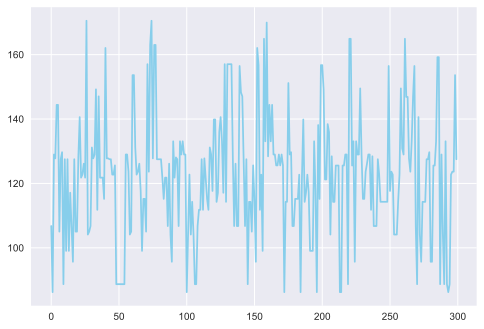

In [25]:
history = genetic_algorithm(n_iter=300, verbose=False, return_history=True)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [45]:
def test_p_cross(start, end, n_trial=200):
    p_cross_lst = np.arange(start, end, 0.1)
    res = []
    for p_cross in p_cross_lst:
        tmp_res = []
        for _ in range(n_trial):
            count = 0
            pop = init_population(10)
            score = pop.score
            while score != 86.25:
                pop.select()
                if pop.score < score:
                    score = pop.score
                pop.mutate(p_cross=p_cross, p_mut=0.2)
                pop = pop.next
                count += 1
            tmp_res.append(count)
        res.append(np.sum(tmp_res) / n_trial)
    plt.plot(p_cross_lst, res, color="skyblue")
    plt.show()

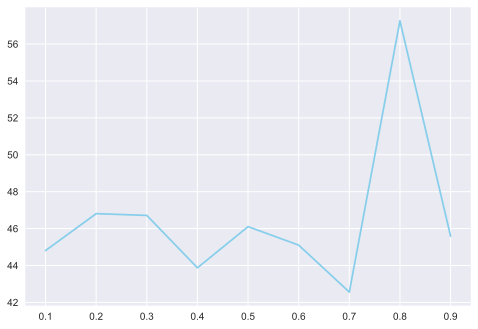

In [46]:
test_p_cross(0.1, 1)

In [47]:
def test_p_mut(start, end, n_trial=100):
    p_mut_lst = np.arange(start, end, 0.1)
    res = []
    for p_mut in p_mut_lst:
        tmp_res = []
        for _ in range(n_trial):
            count = 0
            pop = init_population(10)
            score = pop.score
            while score != 86.25:
                pop.select()
                if pop.score < score:
                    score = pop.score
                pop.mutate(p_mut=p_mut, p_cross=0.2)
                pop = pop.next
                count += 1
            tmp_res.append(count)
        res.append(np.sum(tmp_res) / n_trial)
    plt.plot(p_mut_lst, res, color="skyblue")
    plt.show()

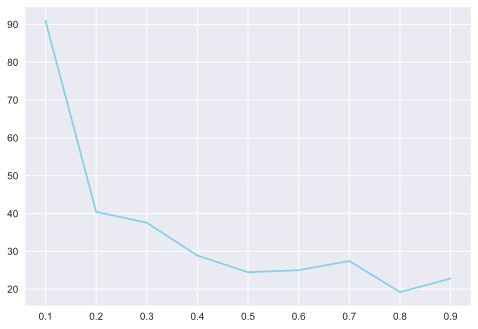

In [48]:
test_p_mut(0.1, 1)